This assignment requires you to perform Exploratory Data Analysis (EDA) on Keith Galli’s Electronics Store dataset, which contains 12 months of sales records with details such as order ID, product, quantity ordered, price, order date, and customer address; your task is to clean the data, engineer useful features like sales revenue, purchase month, city, and time of order, and then use descriptive statistics and visualizations to answer key business questions including identifying the best month for sales and its revenue, determining which city sold the most products, finding the optimal time of day to display advertisements, analyzing which products are most often sold together, and discovering the best-selling product along with reasons for its popularity, while also framing additional questions such as seasonal trends, customer purchasing behavior, or product category contributions to revenue, and finally presenting your findings in a clear, well-documented notebook that can be shared publicly for others to learn from your analysis.

In [2]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing the data using pandas 

january_data = pd.read_csv('./datasets/electronics/Sales_January_2019.csv')
february_data = pd.read_csv('./datasets/electronics/Sales_February_2019.csv')
march_data = pd.read_csv('./datasets/electronics/Sales_March_2019.csv')
april_data = pd.read_csv('./datasets/electronics/Sales_April_2019.csv')
may_data = pd.read_csv('./datasets/electronics/Sales_May_2019.csv')
june_data = pd.read_csv('./datasets/electronics/Sales_June_2019.csv')
july_data = pd.read_csv('./datasets/electronics/Sales_July_2019.csv')
august_data = pd.read_csv('./datasets/electronics/Sales_August_2019.csv')
september_data = pd.read_csv('./datasets/electronics/Sales_September_2019.csv')
october_data = pd.read_csv('./datasets/electronics/Sales_October_2019.csv')
november_data =pd.read_csv('./datasets/electronics/Sales_November_2019.csv')
decemer_data = pd.read_csv('./datasets/electronics/Sales_December_2019.csv')

In [4]:
# Concatenating the data as it will be easier to edit features and extract the features at a single place

concatenated_data = pd.concat([january_data, february_data, march_data, april_data, may_data, 
                               june_data, july_data, august_data, september_data,
                                october_data, november_data, decemer_data], ignore_index=True)

In [5]:
# Just seeing the datasets to know how it looks like... 

concatenated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
# Checking the missing values..

concatenated_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
# Copying the real datasets into a new_one just to confirm main data remains unchanged..

copy_data = concatenated_data.copy()

In [9]:
# Dropping all the missing values as they were less in comparison to the non missing values.
# If the number of missing values are more then I would have done the missing value filling methods.

copy_data = copy_data.dropna()

In [10]:
print(copy_data['Order ID'].nunique())
print(copy_data['Order ID'].unique())

178438
['141234' '141235' '141236' ... '319668' '319669' '319670']


In [11]:
copy_data['Order ID']

0         141234
1         141235
2         141236
3         141237
4         141238
           ...  
186845    319666
186846    319667
186847    319668
186848    319669
186849    319670
Name: Order ID, Length: 186305, dtype: object

In [12]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
copy_data['Order ID'].str.isnumeric().sum()

np.int64(185950)

In [14]:
copy_data[~copy_data['Order ID'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
copy_data = copy_data.drop(copy_data[~copy_data['Order ID'].str.isnumeric()].index)

In [16]:
copy_data[~copy_data['Order ID'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [18]:
copy_data['Order ID'] = copy_data['Order ID'].astype('int')

In [19]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.9+ MB


In [20]:
print(copy_data['Quantity Ordered'].value_counts())
print(copy_data['Quantity Ordered'].nunique())

Quantity Ordered
1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: count, dtype: int64
9


In [21]:
copy_data['Quantity Ordered'].str.isnumeric().sum()

np.int64(185950)

In [22]:
copy_data[~copy_data['Quantity Ordered'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
copy_data['Quantity Ordered'] = copy_data['Quantity Ordered'].astype('int')

In [24]:
copy_data['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [25]:
copy_data['Price Each'] = copy_data['Price Each'].astype('float')

In [26]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


In [27]:
copy_data['Order Date'] = pd.to_datetime(copy_data['Order Date'])

In [28]:
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [29]:
copy_data['Year'] = copy_data['Order Date'].dt.year
copy_data['Month'] = copy_data['Order Date'].dt.month
copy_data['Day'] = copy_data['Order Date'].dt.day

copy_data['Hour'] = copy_data['Order Date'].dt.hour

In [30]:
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11


In [31]:
copy_data = copy_data.drop(columns = ['Order Date'])

In [32]:
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Day,Hour
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,22,21
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,28,14
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,17,13
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,5,20
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,25,11


In [33]:
copy_data['Order ID'].duplicated().sum()

np.int64(7513)

In [34]:
copy_data.shape

(185950, 9)

In [35]:
copy_data = copy_data.drop_duplicates(subset=['Order ID'], keep='first')

In [36]:
copy_data.duplicated().sum()

np.int64(0)

In [37]:
# Making the Sales column which will be needed for the plots

copy_data['Sales'] = copy_data['Quantity Ordered'] * copy_data['Price Each']

In [38]:
copy_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Year,Month,Day,Hour,Sales
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,700.00
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",2019,1,28,14,14.95
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,23.98
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,149.99
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",2019,1,25,11,11.99


In [39]:
# Extracting city from Purchase Adress using string split methods

copy_data['City'] = copy_data['Purchase Address'].str.split(',').str[1].str.strip()

In [40]:
copy_data.describe()

,Order ID,Quantity Ordered,Price Each,Year,Month,Day,Hour,Sales
count,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000
mean,230452.000000,1.125596,187.611323,2019.000174,7.061495,15.761557,14.411916,188.703013
std,51510.469329,0.445198,335.317522,0.013180,3.502690,8.782257,5.423222,335.513390
min,141234.000000,1.000000,2.990000,2019.000000,1.000000,1.000000,0.000000,2.990000
25%,185843.000000,1.000000,11.950000,2019.000000,4.000000,8.000000,11.000000,11.950000
50%,230452.000000,1.000000,14.950000,2019.000000,7.000000,16.000000,15.000000,14.950000
75%,275061.000000,1.000000,150.000000,2019.000000,10.000000,23.000000,19.000000,150.000000
max,319670.000000,9.000000,1700.000000,2020.000000,12.000000,31.000000,23.000000,3400.000000


In [41]:
# Doing all the descriptive statistics of the numeric data to get more knowledge of the data

print("___DESCRIPTIVE STATISTICS__")
print(f"\nTotal Revenue: ${copy_data['Sales'].sum():,.2f}")
print(f"Average Order Value: ${copy_data['Sales'].mean():,.2f}")
print(f"Total Orders: {len(copy_data)}")
print(f"Total Products Sold: {copy_data['Quantity Ordered'].sum()}")

print(f"\nPrice Statistics:\n{copy_data['Price Each'].describe()}")
print(f"\nQuantity Statistics:\n{copy_data['Quantity Ordered'].describe()}")

___DESCRIPTIVE STATISTICS__

Total Revenue: $33,671,599.47
Average Order Value: $188.70
Total Orders: 178437
Total Products Sold: 200848

Price Statistics:
count    178437.000000
mean        187.611323
std         335.317522
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

Quantity Statistics:
count    178437.000000
mean          1.125596
std           0.445198
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64


Month
1     1782214.90
2     2146232.20
3     2739938.02
4     3308277.50
5     3075410.70
6     2516633.11
7     2584388.35
8     2192824.44
9     2048845.16
10    3651082.99
11    3120487.12
12    4505264.98
Name: Sales, dtype: float64


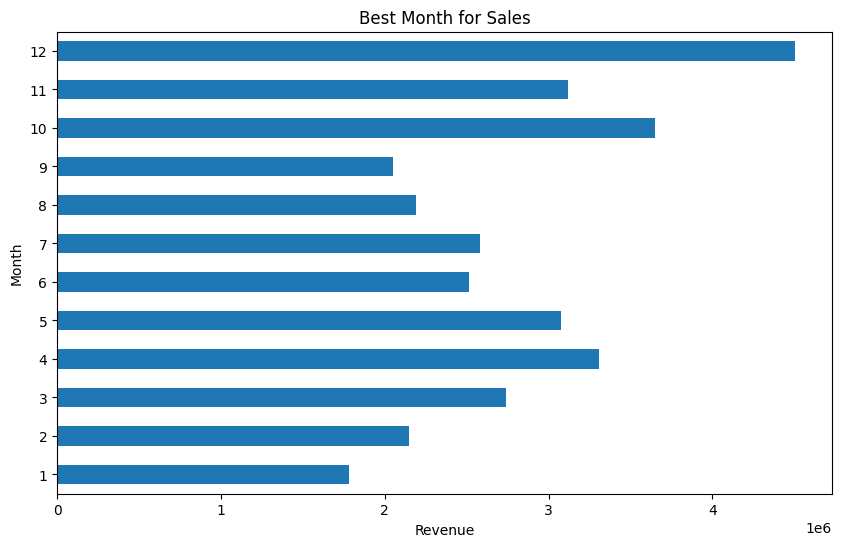

In [42]:
# Identifying the best month for sales and its revenue, first using groupby
#  function and then using the bargraph 

monthly_sales = copy_data.groupby('Month')['Sales'].sum()
print(monthly_sales)

fig ,ax1 = plt.subplots(1, figsize = (10,6))

monthly_sales.plot(kind = 'barh', ax = ax1)
ax1.set_title('Best Month for Sales')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Month')

plt.show()


City
Atlanta          15939
Austin           10717
Boston           21594
Dallas           16100
Los Angeles      32085
New York City    26790
Portland         13518
San Francisco    48226
Seattle          15879
Name: Quantity Ordered, dtype: int64


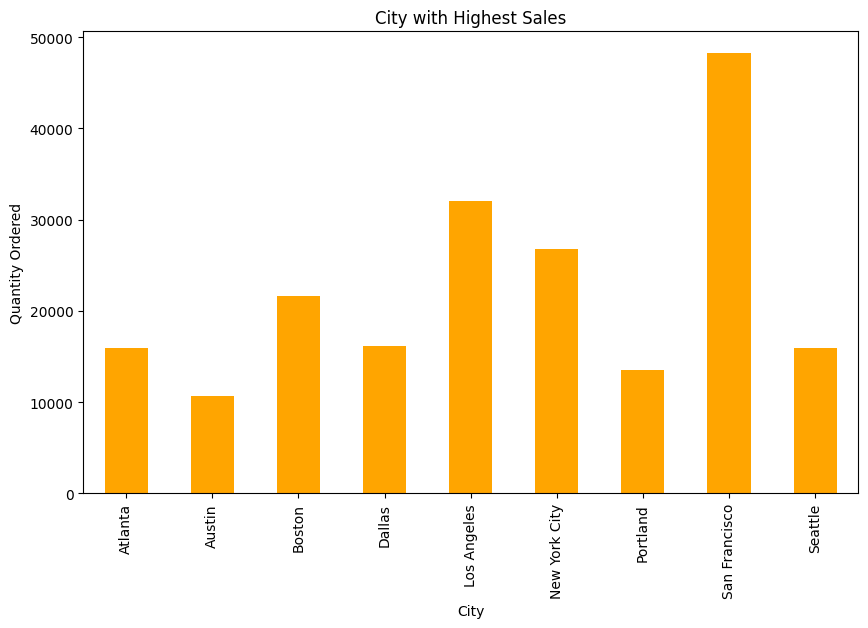

In [43]:
# Determinig the best city with highest sales of the product

city_sales = copy_data.groupby('City')['Quantity Ordered'].sum()
print(city_sales)

fig, ax = plt.subplots(1, figsize = (10,6))
city_sales.plot(kind = 'bar', color = 'orange', ax = ax)
ax.set_title('City with Highest Sales')
ax.set_xlabel('City')
ax.set_ylabel('Quantity Ordered')

plt.show()

Hour
0      698026.38
1      448714.66
2      229557.77
3      142703.69
4      157537.93
5      223563.76
6      439315.79
7      729061.89
8     1168940.67
9     1595857.04
10    1889044.84
11    2249717.57
12    2264469.15
13    2111724.35
14    2033071.79
15    1902166.50
16    1861280.04
17    2078616.93
18    2165784.60
19    2353995.44
20    2231956.43
21    1997458.97
22    1554596.38
23    1144436.90
Name: Sales, dtype: float64


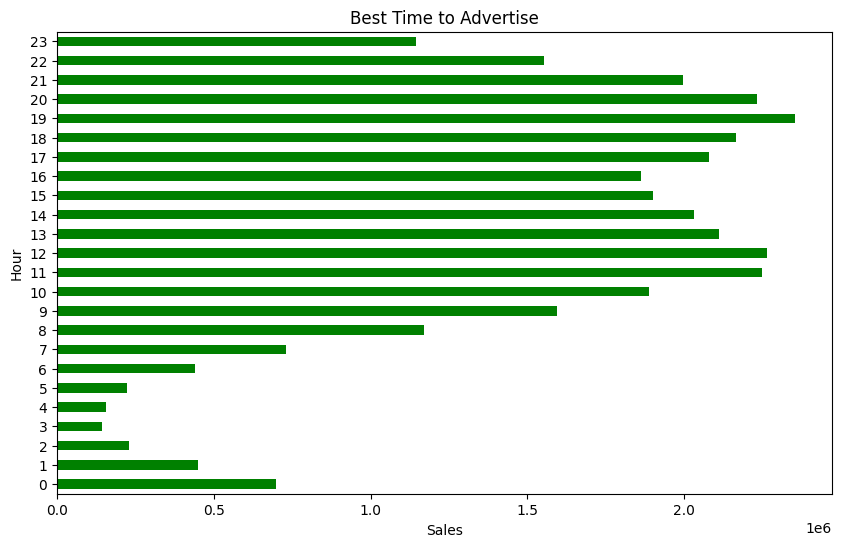

In [44]:
 # SImilarly Finding the best time(hour) to advertise the product

best_time = copy_data.groupby('Hour')['Sales'].sum()
print(best_time)

fig , ax = plt.subplots(1, figsize = (10,6))

best_time.plot(kind= 'barh', color = 'green', ax = ax)
ax.set_title('Best Time to Advertise')
ax.set_xlabel('Sales')
ax.set_ylabel('Hour')
plt.show()


Product
20in Monitor                   4049
27in 4K Gaming Monitor         6118
27in FHD Monitor               7393
34in Ultrawide Monitor         6073
AA Batteries (4-pack)         27136
AAA Batteries (4-pack)        30372
Apple Airpods Headphones      15016
Bose SoundSport Headphones    12894
Flatscreen TV                  4719
Google Phone                   5423
LG Dryer                        633
LG Washing Machine              653
Lightning Charging Cable      21715
Macbook Pro Laptop             4628
ThinkPad Laptop                4038
USB-C Charging Cable          22109
Vareebadd Phone                2030
Wired Headphones              19120
iPhone                         6729
Name: Quantity Ordered, dtype: int64


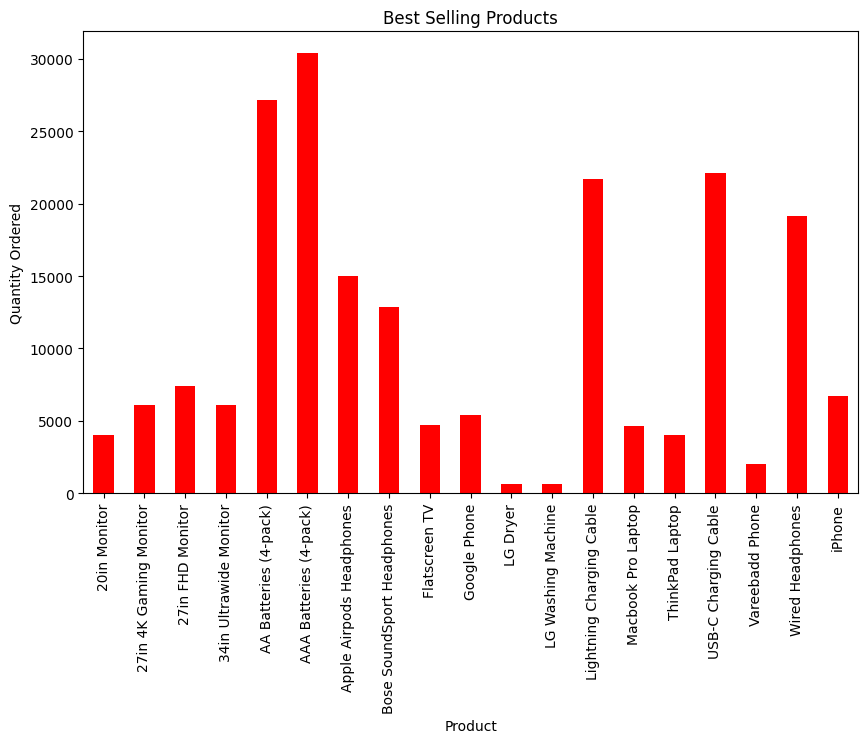

In [45]:
# Finding the best selling product 

best_selling_product = copy_data.groupby('Product')['Quantity Ordered'].sum()
print(best_selling_product)

fig, ax = plt.subplots( figsize = (10,6))
best_selling_product.plot(kind = 'bar', color = 'red',ax = ax)
ax.set_title('Best Selling Products') 
ax.set_xlabel('Product')
ax.set_ylabel('Quantity Ordered')
plt.show()



Month
1      9293
2     11496
3     14549
4     17528
5     15836
6     12989
7     13761
8     11484
9     11202
10    19436
11    16859
12    24004
dtype: int64
-------
Month
1     191.780362
2     186.693824
3     188.324835
4     188.742441
5     194.203757
6     193.751106
7     187.805272
8     190.946050
9     182.899943
10    187.851564
11    185.093251
12    187.688093
Name: Sales, dtype: float64


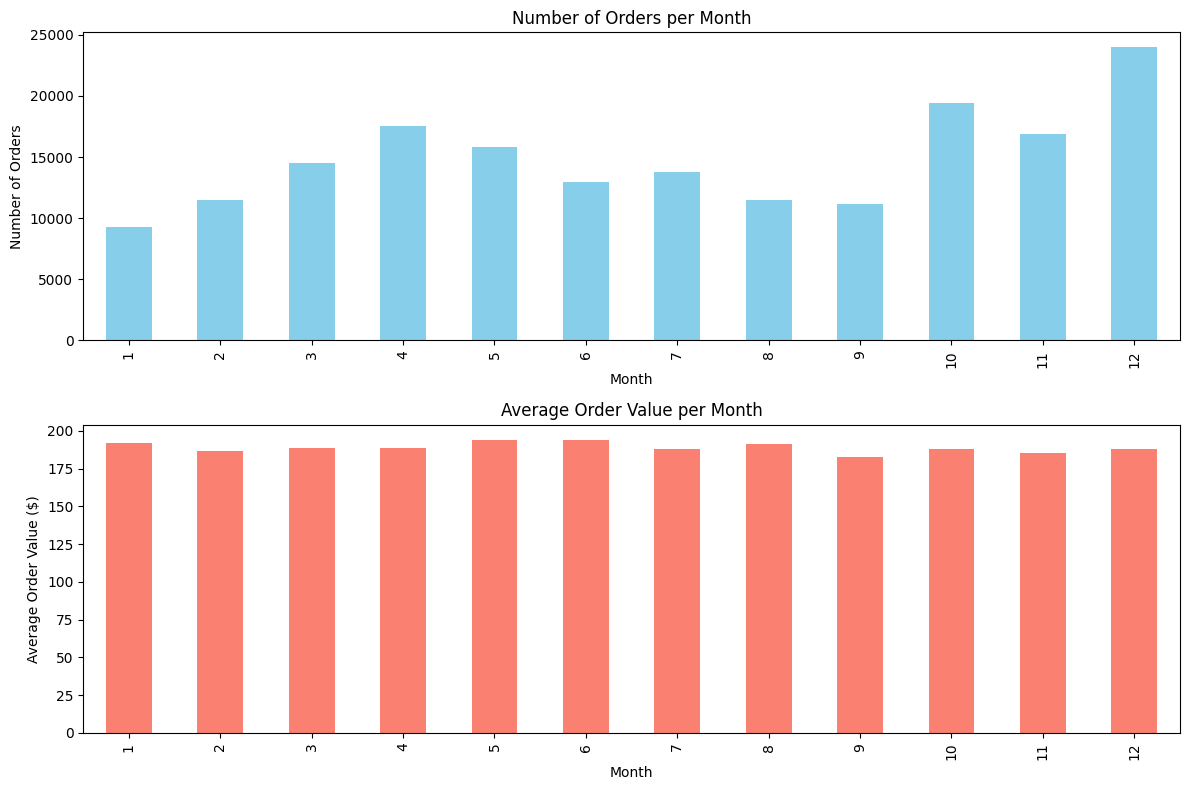

In [46]:
# Customer Purchasing Behavior
orders_per_month = copy_data.groupby('Month').size()
avg_order_value = copy_data.groupby('Month')['Sales'].mean()

print(orders_per_month)
print('-------')
print(avg_order_value)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

orders_per_month.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Number of Orders per Month', fontsize=12)
ax1.set_ylabel('Number of Orders')
ax1.set_xlabel('Month')


avg_order_value.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Average Order Value per Month', fontsize=12)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Order Value ($)')


plt.tight_layout()
plt.show()

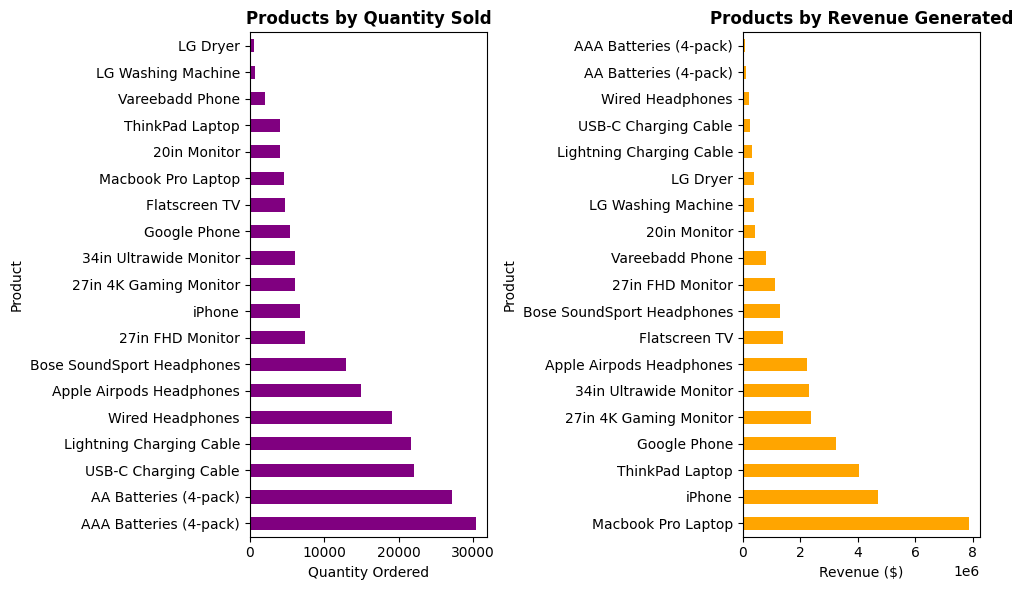

In [47]:
# Which products sell most vs generate most revenue
product_qty = copy_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
product_revenue_sorted = copy_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

product_qty.plot(kind='barh', color='purple', ax=ax1)
ax1.set_title('Products by Quantity Sold', fontsize=12, fontweight='bold')
ax1.set_xlabel('Quantity Ordered')

product_revenue_sorted.plot(kind='barh', color='orange', ax=ax2)
ax2.set_title('Products by Revenue Generated', fontsize=12, fontweight='bold')
ax2.set_xlabel('Revenue ($)')

plt.tight_layout()
plt.show()

In [48]:
pivot_data = copy_data.pivot_table(values='Sales', index='Hour', columns='Product', aggfunc='sum')
pivot_data

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Hour,,,,,,,,,,,,,,,,,,,
0,9239.16,42898.90,27298.18,56618.51,2000.64,2098.98,50850.0,27997.20,30300.0,67800.0,11400.0,6600.0,6129.50,142800.0,87999.12,5688.20,22400.0,4807.99,93100.0
1,4619.58,30419.22,13649.09,29639.22,1186.56,1133.21,30450.0,14898.51,18000.0,49200.0,1200.0,4800.0,4380.35,113900.0,50999.49,3417.70,7600.0,2721.73,66500.0
2,3849.65,16769.57,8249.45,12919.66,664.32,603.98,16500.0,7999.20,8700.0,20400.0,600.0,1200.0,2287.35,61200.0,27999.72,1900.05,4800.0,1414.82,31500.0
3,1539.86,12089.69,7799.48,7599.80,464.64,412.62,9450.0,5899.41,6000.0,12000.0,2400.0,600.0,1569.75,35700.0,17999.82,1063.55,3600.0,1115.07,15400.0
4,1759.84,12479.68,6299.58,10259.73,368.64,388.70,11100.0,5899.41,7500.0,13800.0,2400.0,2400.0,1480.05,34000.0,17999.82,1099.40,4800.0,1103.08,22400.0
5,3629.67,15599.60,7499.50,15199.60,718.08,666.77,14400.0,8399.16,11400.0,25200.0,2400.0,3000.0,2257.45,49300.0,17999.82,2007.60,6400.0,1786.51,35700.0
6,7149.35,28469.27,15598.96,31539.17,1359.36,1196.00,29400.0,17398.26,21900.0,44400.0,5400.0,4200.0,4440.15,95200.0,47999.52,3788.15,11200.0,2877.60,65800.0
7,11328.97,46408.81,21298.58,46358.78,2311.68,2036.19,50250.0,24997.50,30600.0,66600.0,6000.0,6000.0,7280.65,195500.0,88999.11,5759.90,15600.0,5131.72,96600.0
8,15068.63,76048.05,34947.67,79417.91,3390.72,3064.75,75900.0,41895.81,50700.0,120600.0,15600.0,10200.0,11347.05,273700.0,152998.47,8580.10,31600.0,7781.51,156100.0


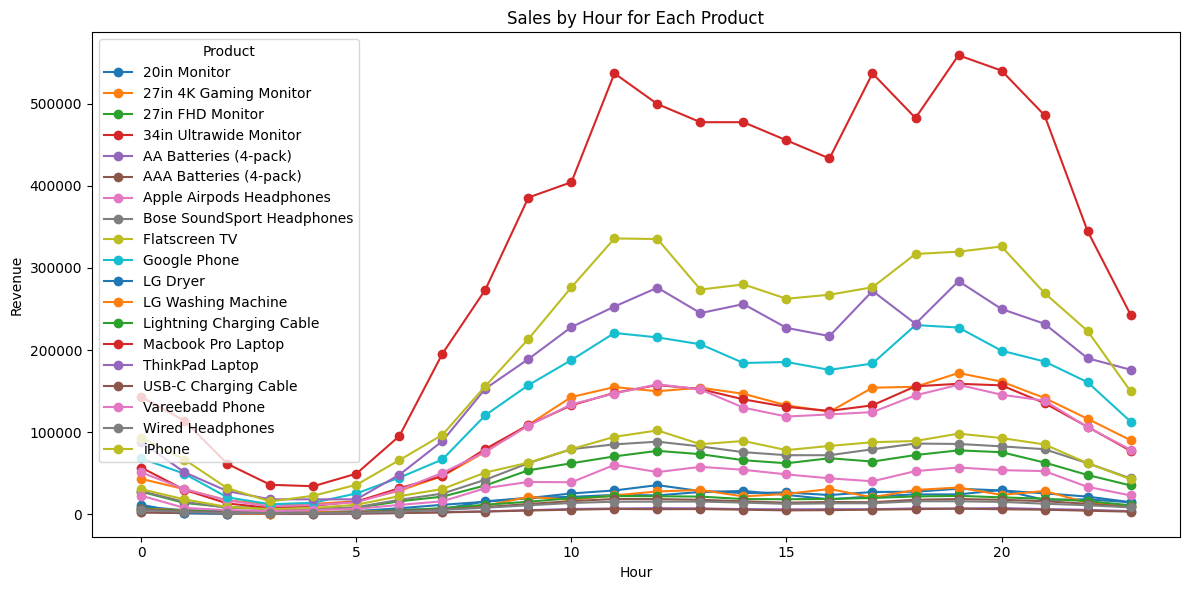

In [49]:
# Peak shopping hours by product
fig, ax = plt.subplots(figsize=(12, 6))

pivot_data.plot(kind='line', ax=ax, marker='o')
ax.set_title('Sales by Hour for Each Product', fontsize=12)
ax.set_xlabel('Hour')
ax.set_ylabel('Revenue')

plt.tight_layout()
plt.show()

# Findings and Doings

Cleaned 12 months of sales data, engineered Sales, Month, Day, Hour, City, and performed descriptive and visual analyses to identify revenue drivers, seasonal patterns, customer behaviour, and product relationships.

## Key findings
- Best month by revenue:
    . December  — Revenue: $4505264.98

- Top cities by revenue: 
   City             Ordered Quantity
    Atlanta          15939
    Austin           10717
    Boston           21594
    Dallas           16100
    Los Angeles      32085

- Peak ad hour(s): Peak hour for the ad is 19th hour of the day with 2353995.44 sales.

- Best-selling products (by quantity) and top revenue-generating products:
   Best selling products of the store is AAA Batteries (4-pack) followed by AA Batteries (4-pack) however the best revenue generating products are none of them but MacBookPro Laptop.


## Notes 
- I dropped the missing rows along with invalid Order IDs resultng in less documents counts compared to original counts. 
- Also the duplicated values were also dropped keeping the first as it is.
- I've done a detailed EDA (Exploratory Data Analysis) in this datasets and done multiple plots to get the extra required knowledge for the store.
